In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train=pd.read_csv("house_train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_columns',None)
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
data_train.shape

(1460, 81)

In [7]:
data_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [8]:
#Missing Value Count Function
def show_missing():
    missing = data_train.columns[data_train.isnull().any()].tolist()
    return missing

#Missing data counts and percentage
print('Missing Data Count')
print(data_train[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data_train[show_missing()].isnull().sum().sort_values(ascending = False)))

Missing Data Count
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [9]:
#functions to address missing values
def feat_explore(column):
    return data_train[column].value_counts()
#functions to impute missing values
def feat_impute(column, value):
    data_train.loc[data_train[column].isnull(),column] = value

In [10]:
#Features with over 50% of its observations missing will be removed
data_train = data_train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [11]:
#FireplaceQu missing data
print('FireplaceQu Missing Before:', data_train['FireplaceQu'].isnull().sum())
print('--'*40)

#The null values may be homes that do not have fireplace at all. Need to check this assumption
print(data_train[data_train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']])
print(data_train[data_train['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']].shape)
print('--'*40)

#Impute the nulls with None
data_train['FireplaceQu']=data_train['FireplaceQu'].fillna('None')
print('FireplaceQu Missing After:',data_train['FireplaceQu'].isnull().sum())
print('--'*40)

#Cross check columns
print('Confirm Imputation')
print(pd.crosstab(data_train.FireplaceQu,data_train.Fireplaces,))


FireplaceQu Missing Before: 690
--------------------------------------------------------------------------------
      Fireplaces FireplaceQu
0              0         NaN
5              0         NaN
10             0         NaN
12             0         NaN
15             0         NaN
...          ...         ...
1452           0         NaN
1453           0         NaN
1454           0         NaN
1458           0         NaN
1459           0         NaN

[690 rows x 2 columns]
(690, 2)
--------------------------------------------------------------------------------
FireplaceQu Missing After: 0
--------------------------------------------------------------------------------
Confirm Imputation
Fireplaces     0    1   2  3
FireplaceQu                 
Ex             0   19   4  1
Fa             0   28   4  1
Gd             0  324  54  2
None         690    0   0  0
Po             0   20   0  0
TA             0  259  53  1


<Axes: xlabel='LotFrontage', ylabel='Density'>

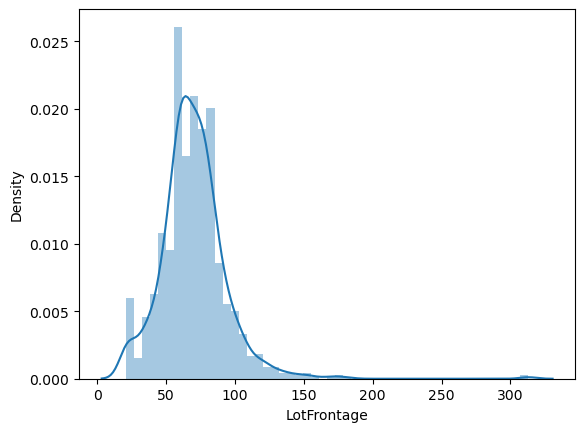

In [12]:
sns.distplot(data_train.LotFrontage.dropna())

In [13]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(data_train['LotFrontage'].median())
print('Lotfrontage Missing After:', data_train['LotFrontage'].isnull().sum())

Lotfrontage Missing After: 0


In [14]:
print(data_train[['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']].isnull().sum())

#Assumptions check
print('--'*50)
print('Assumption Check')
null_garage=['GarageYrBlt','GarageType','GarageQual','GarageCond','GarageFinish']
print(data_train[(data_train['GarageYrBlt'].isnull())|
                 (data_train['GarageType'].isnull())|
                 (data_train['GarageQual'].isnull())|
                 (data_train['GarageCond'].isnull())|
                 (data_train['GarageFinish'].isnull())]
                 [['GarageCars','GarageYrBlt','GarageType','GarageQual','GarageCond','GarageFinish']])

#Impute null garbage features
for cols in null_garage:
    if data_train[cols].dtype  == np.object:
        feat_impute(cols, 'None')
    else:
        feat_impute(cols,0)
        
#Garbage Features After
print('--'*50)
print('Garbage Features Missing After')
print(data_train[['GarageYrBlt','GarageType','GarageFinish','GarageQual','GarageCond']].isnull().sum())
print('--'*50)
#Cross check columns
print('Confirm Imputation')
for col in null_garage:
    print(pd.crosstab(data_train[cols],data_train.GarageCars))

GarageYrBlt     81
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
      GarageCars  GarageYrBlt GarageType GarageQual GarageCond GarageFinish
39             0          NaN        NaN        NaN        NaN          NaN
48             0          NaN        NaN        NaN        NaN          NaN
78             0          NaN        NaN        NaN        NaN          NaN
88             0          NaN        NaN        NaN        NaN          NaN
89             0          NaN        NaN        NaN        NaN          NaN
...          ...          ...        ...        ...        ...          ...
1349           0          NaN        NaN        NaN        NaN          NaN
1407           0          NaN        NaN        NaN        NaN          NaN
1449           0          NaN        NaN        NaN        NaN          NaN
1450          

In [15]:
#Basement Features 
print('Basement Features Missing Before')
print(data_train[['BsmtFinType2','BsmtExposure']].isnull().sum())
print('--'*50)

#BsmtFinType2 and BsmtExposure are both missing 38 observtions
#Check that data is missing in the same rows
#Confirm if all nulls correspond to homes without basements
print('Assumption Check')
null_basement = ['BsmtFinType2','BsmtExposure']
print(data_train[data_train['BsmtFinType2'].isnull()|(data_train['BsmtExposure'].isnull())][['TotalBsmtSF','BsmtFinType2','BsmtExposure']])
print('entries',data_train[data_train['BsmtFinType2'].isnull()|(data_train['BsmtExposure'].isnull())][['TotalBsmtSF','BsmtFinType2','BsmtExposure']])

Basement Features Missing Before
BsmtFinType2    38
BsmtExposure    38
dtype: int64
----------------------------------------------------------------------------------------------------
Assumption Check
      TotalBsmtSF BsmtFinType2 BsmtExposure
17              0          NaN          NaN
39              0          NaN          NaN
90              0          NaN          NaN
102             0          NaN          NaN
156             0          NaN          NaN
182             0          NaN          NaN
259             0          NaN          NaN
332          3206          NaN           No
342             0          NaN          NaN
362             0          NaN          NaN
371             0          NaN          NaN
392             0          NaN          NaN
520             0          NaN          NaN
532             0          NaN          NaN
533             0          NaN          NaN
553             0          NaN          NaN
646             0          NaN          NaN
705   

In [16]:
#Impute the only null BsmtFinType2 with a basement at index 332 with most frequent value
data_train.iloc[332,data_train.columns.get_loc('BsmtFinType2')]= data_train['BsmtFinType2'].mode()[0]

#Impute the only null BsmtExposure with Basement at index 948 with most frequent value
data_train.iloc[948,data_train.columns.get_loc('BsmtExposure')]=data_train['BsmtExposure'].mode()[0]

#Impute the remaining nulls as none
for cols in null_basement:
    if data_train[cols].dtype == np.object:
        feat_impute(cols,'None')
    else:
        feat_impute(cols, 0)

#Basement Features After
print('--'*40)
print('Basement Features Missing After')
print(data_train[['BsmtFinType2','BsmtExposure']].isnull().sum())
print('--'*40)
#Cross check columns
print('Confirm Imputation')
for cols in null_basement:
    print(pd.crosstab(data_train.TotalBsmtSF,data_train[cols]))

--------------------------------------------------------------------------------
Basement Features Missing After
BsmtFinType2    0
BsmtExposure    0
dtype: int64
--------------------------------------------------------------------------------
Confirm Imputation
BsmtFinType2  ALQ  BLQ  GLQ  LwQ  None  Rec  Unf
TotalBsmtSF                                     
0               0    0    0    0    37    0    0
105             0    0    0    0     0    0    1
190             0    0    0    0     0    0    1
264             0    0    0    0     0    0    3
270             0    0    0    0     0    0    1
...           ...  ...  ...  ...   ...  ...  ...
3094            1    0    0    0     0    0    0
3138            0    0    0    0     0    0    1
3200            0    0    0    0     0    0    1
3206            0    0    0    0     0    0    1
6110            0    0    0    0     0    0    1

[721 rows x 7 columns]
BsmtExposure  Av  Gd  Mn  No  None
TotalBsmtSF                       
0      

In [17]:
print('Basement Features Part 2 Missing Before')
print(data_train[['BsmtFinType1', 'BsmtCond', 'BsmtQual']].isnull().sum())
print('--'*5)

#Check assumptions
null_basement2= ['BsmtFinType1', 'BsmtCond', 'BsmtQual']
print('Assumption Check')
print(data_train[(data_train['BsmtFinType1'].isnull())|(data_train['BsmtCond'].isnull())|(data_train['BsmtQual'].isnull())]
                 [['TotalBsmtSF','BsmtFinType1','BsmtCond','BsmtQual']])
print('entries',data_train [(data_train['BsmtFinType1'].isnull())|
                            (data_train['BsmtCond'].isnull())|
                            (data_train['BsmtQual'].isnull())]
                        [['TotalBsmtSF','BsmtFinType1','BsmtCond','BsmtQual']].shape)
            
                 
#Impute nulls to None or 0
for cols in null_basement2:
    if data_train[cols].dtype ==np.object:
        cols = feat_impute(cols, 'None')
    else:
        cols = feat_impute(cpls, 0)
                 
print('--'*50)
print('Basement Features Part 2 Missing After')
print(data_train[['BsmtFinType1','BsmtCond','BsmtQual']].isnull().sum())

Basement Features Part 2 Missing Before
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
dtype: int64
----------
Assumption Check
      TotalBsmtSF BsmtFinType1 BsmtCond BsmtQual
17              0          NaN      NaN      NaN
39              0          NaN      NaN      NaN
90              0          NaN      NaN      NaN
102             0          NaN      NaN      NaN
156             0          NaN      NaN      NaN
182             0          NaN      NaN      NaN
259             0          NaN      NaN      NaN
342             0          NaN      NaN      NaN
362             0          NaN      NaN      NaN
371             0          NaN      NaN      NaN
392             0          NaN      NaN      NaN
520             0          NaN      NaN      NaN
532             0          NaN      NaN      NaN
533             0          NaN      NaN      NaN
553             0          NaN      NaN      NaN
646             0          NaN      NaN      NaN
705             0          Na

In [18]:
#MasVnrArea and MasVnrType are each missing 8 observtions
print('Masonary Features Missing Before')
print(data_train[['MasVnrArea','MasVnrType']].isnull().sum())
print('--'*50)

#Confirm that the missing values in these columns are the same rows
print('Check Assumptions')
print(data_train[(data_train['MasVnrArea'].isnull())|
                 (data_train['MasVnrType'].isnull())]
                  [['MasVnrArea','MasVnrType']])

print(data_train[(data_train['MasVnrArea'].isnull())|
                 (data_train['MasVnrType'].isnull())]
                  [['MasVnrArea','MasVnrType']].shape)

#Impute MasVnrArea with the most frequent values
data_train['MasVnrArea']=data_train['MasVnrType'].fillna(data_train['MasVnrArea'].mode()[0])

#Impute MasVnrType with the most frequent values
data_train['MasVnrType']=data_train['MasVnrArea'].fillna(data_train['MasVnrType'].mode()[0])

print('Masonary Features Missing After')
print(data_train[['MasVnrArea','MasVnrType']].isnull().sum())
print('--'*50)

print('Confirm Imputation')
print(data_train[(data_train['MasVnrType'].isnull())|
                 (data_train['MasVnrArea'].isnull())]
                 [['MasVnrArea','MasVnrType']])

Masonary Features Missing Before
MasVnrArea    8
MasVnrType    8
dtype: int64
----------------------------------------------------------------------------------------------------
Check Assumptions
      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
(8, 2)
Masonary Features Missing After
MasVnrArea    0
MasVnrType    0
dtype: int64
----------------------------------------------------------------------------------------------------
Confirm Imputation
Empty DataFrame
Columns: [MasVnrArea, MasVnrType]
Index: []


In [19]:
print('Electrical Feature Missing Before')
print(data_train[['Electrical']].isnull().sum())
print('--'*50)

#Impute Electrical with the most frequent value, 'SBrkr'
data_train['Electrical']=data_train['Electrical'].fillna(data_train['Electrical'].mode()[0])
print('Electrical Feature Missing After')
print(data_train[['Electrical']].isnull().sum())
print('--'*50)

Electrical Feature Missing Before
Electrical    1
dtype: int64
----------------------------------------------------------------------------------------------------
Electrical Feature Missing After
Electrical    0
dtype: int64
----------------------------------------------------------------------------------------------------


In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
#find categorical variables
categorical = [var for var in data_train.columns if data_train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 40 categorical variables


In [22]:
#find Numerical variables
numerical = [var for var in data_train.columns if data_train[var].dtype!='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 40 categorical variables


In [23]:
discrete = []
for var in numerical:
    if len(data_train[var].unique())<20:
        print(var, 'values:',data_train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass values: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual values: [ 7  6  8  5  9  4 10  3  1  2]
OverallCond values: [5 8 6 7 4 2 3 9 1]
BsmtFullBath values: [1 0 2 3]
BsmtHalfBath values: [0 1 2]
FullBath values: [2 1 3 0]
HalfBath values: [1 0 2]
BedroomAbvGr values: [3 4 1 2 0 5 6 8]
KitchenAbvGr values: [1 2 3 0]
TotRmsAbvGrd values: [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces values: [0 1 2 3]
GarageCars values: [2 3 1 0 4]
PoolArea values: [  0 512 648 576 555 480 519 738]
MoSold values: [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold values: [2008 2007 2006 2009 2010]
There are 15 discrete variables


In [24]:
continuous = [var for var in numerical if var not in discrete and var not in['ID','SalePrice']]


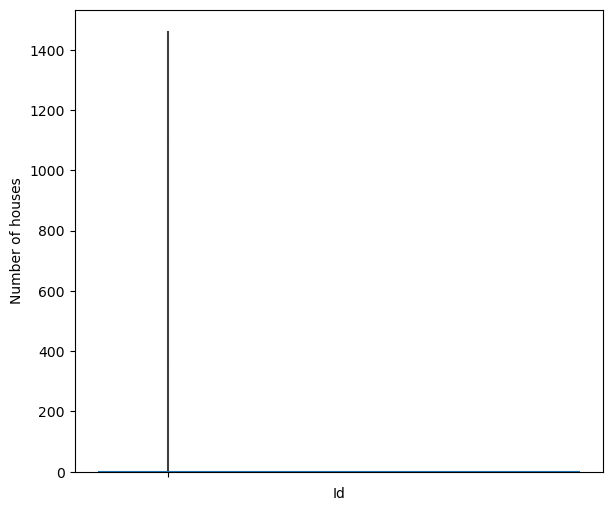

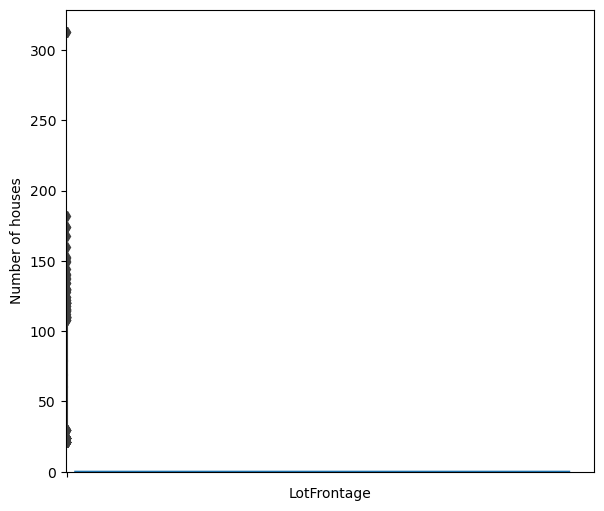

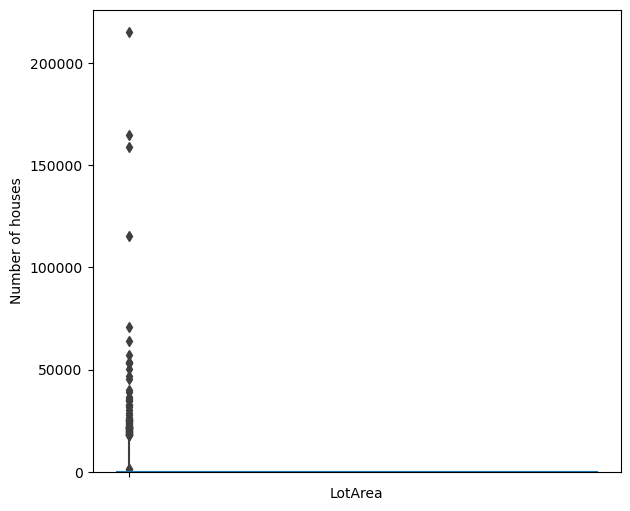

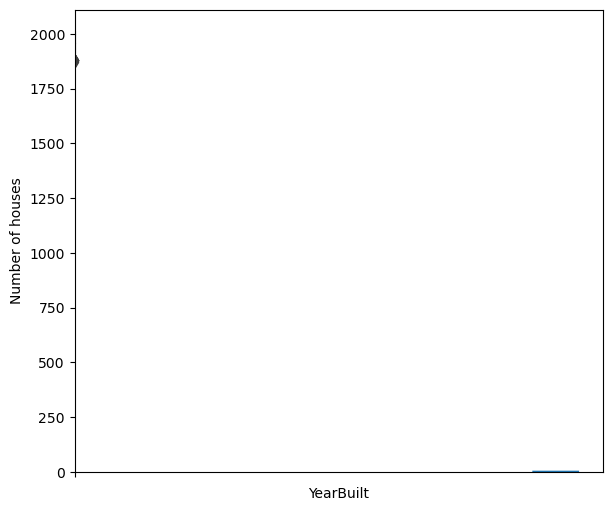

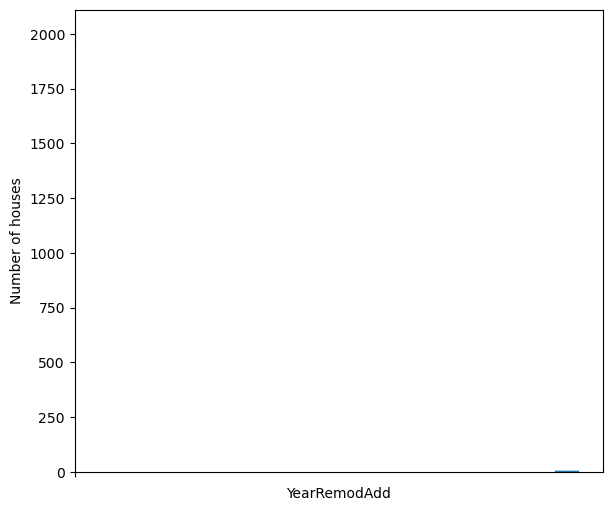

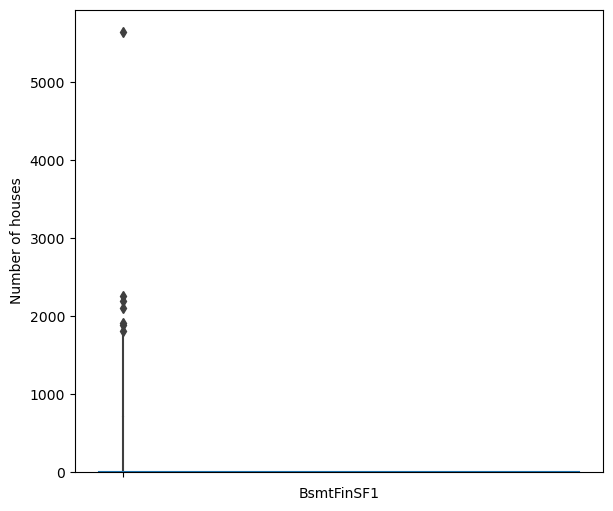

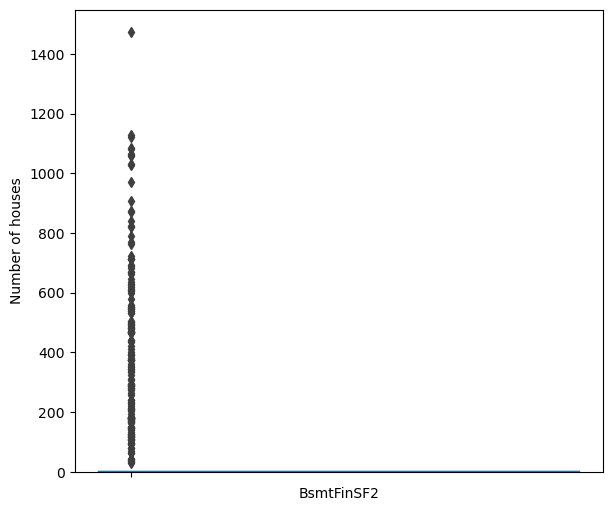

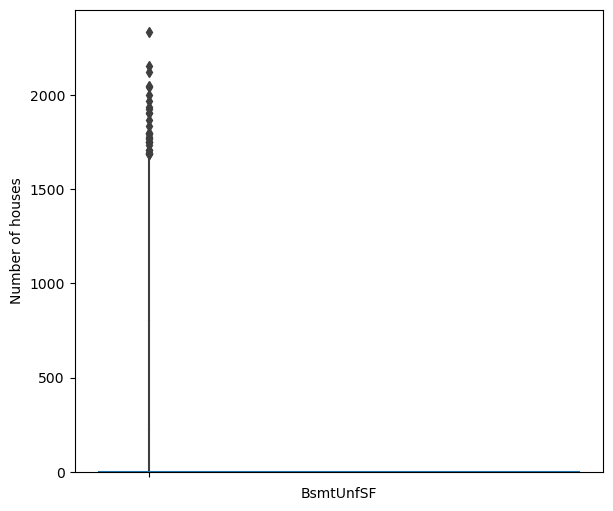

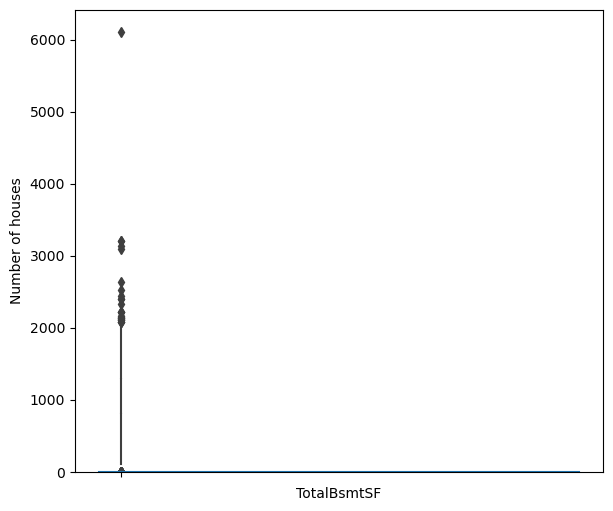

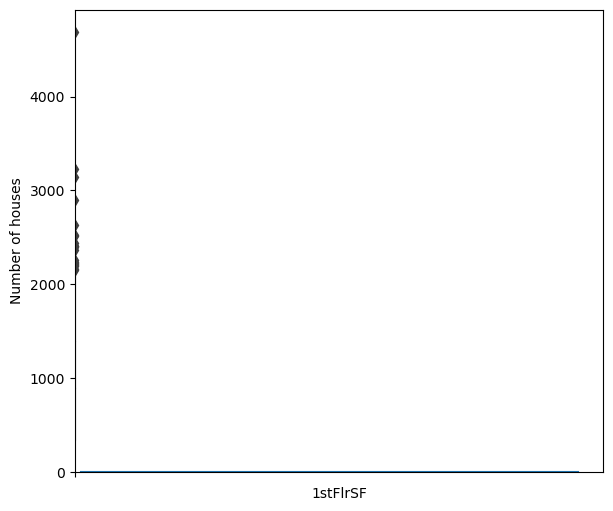

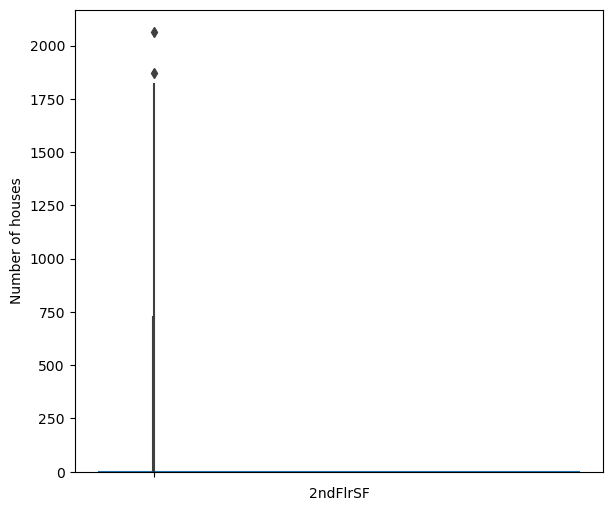

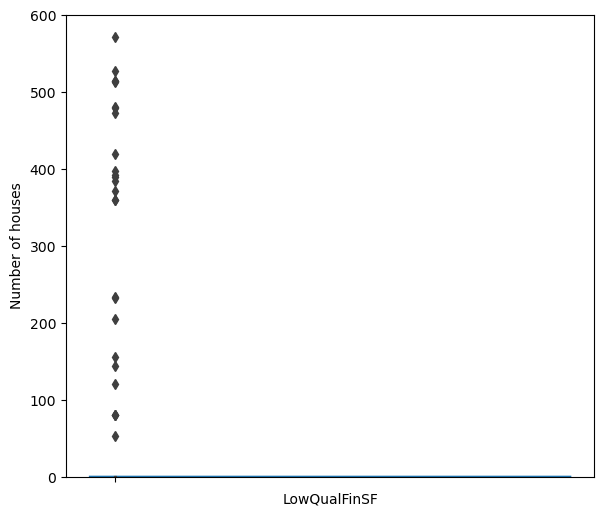

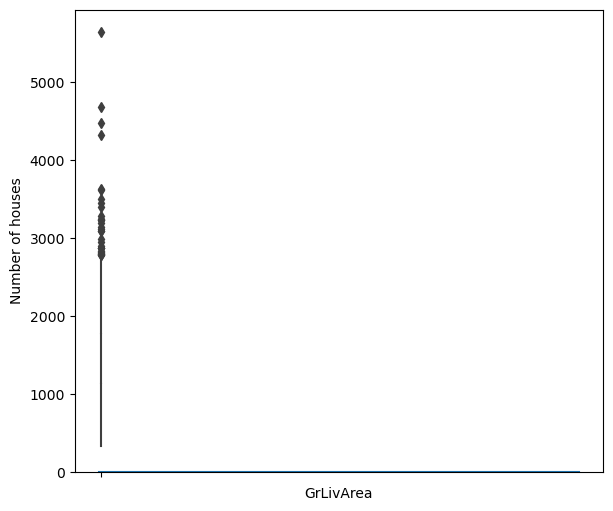

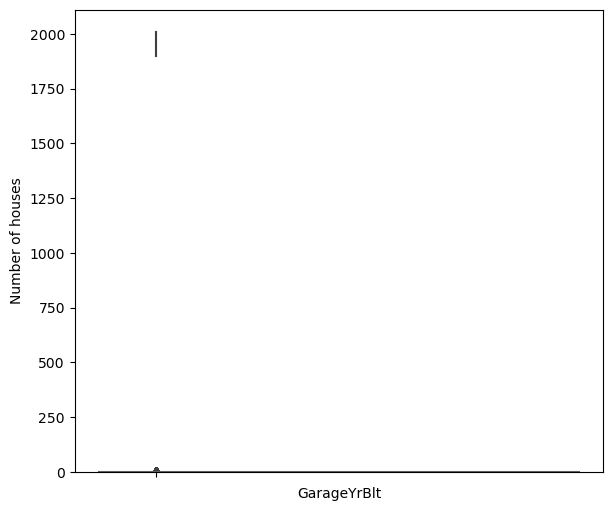

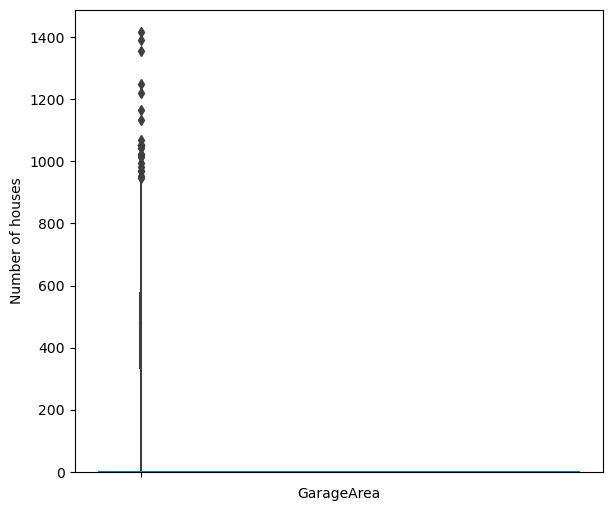

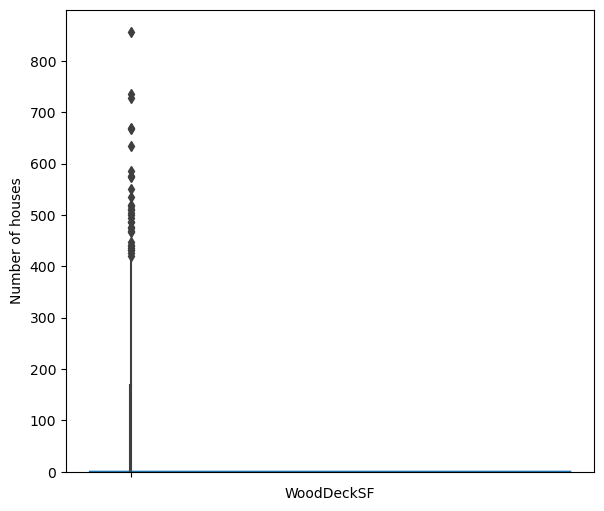

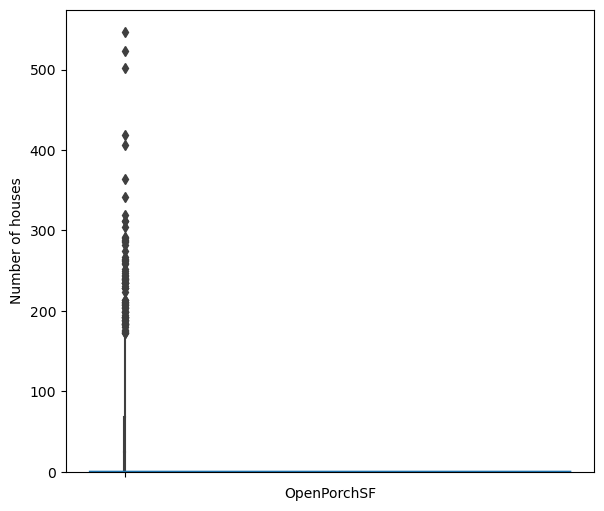

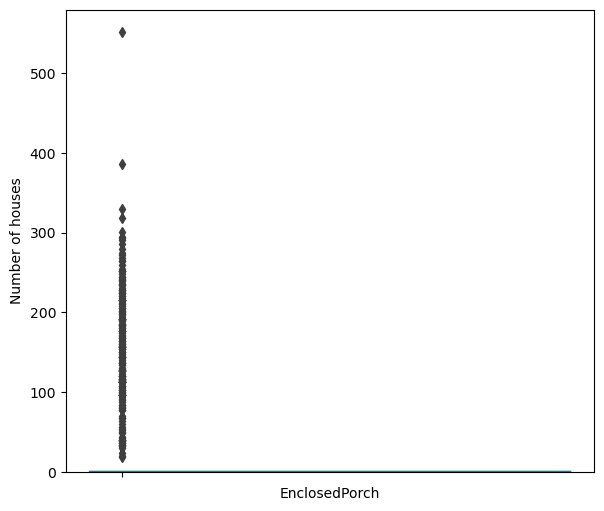

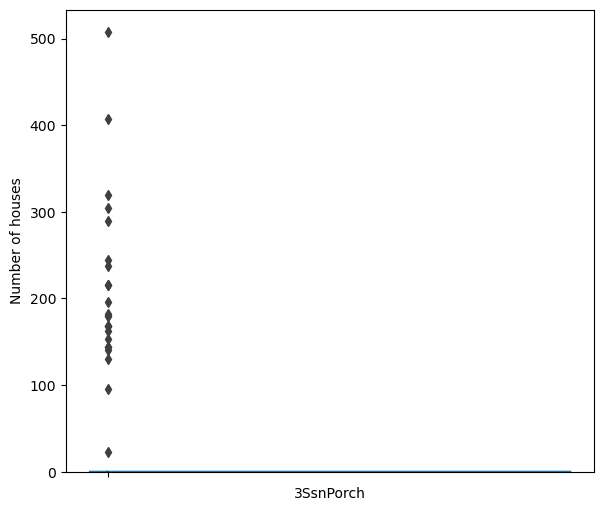

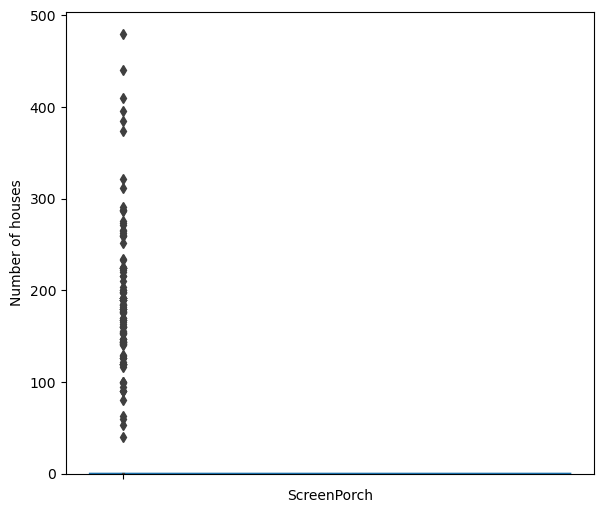

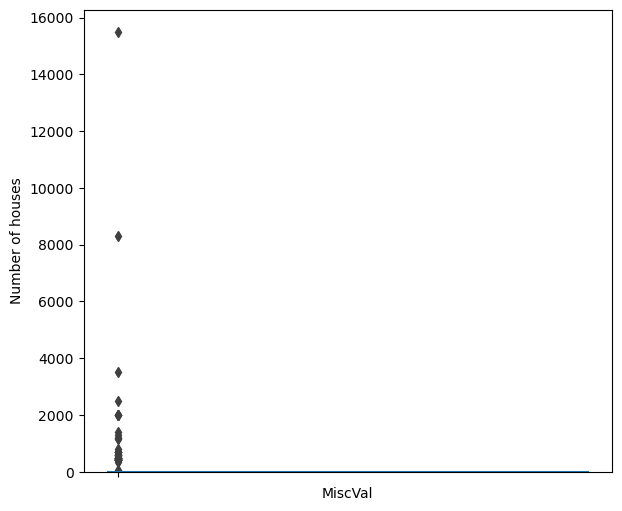

In [25]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    fig = sns.boxplot(y=data_train[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,1)
    fig = sns.distplot(data_train[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)
    
    plt.show()

In [27]:
#Capping the outliers with percentiles
upper_lim = data_train['LotFrontage'].quantile(.95)
lower_lim = data_train['LotFrontage'].quantile(.05)
data_train.loc[(data_train["LotFrontage"] > upper_lim),"LotFrontage"] = upper_lim
data_train.loc[(data_train["LotFrontage"] < lower_lim),"LotFrontage"] = lower_lim



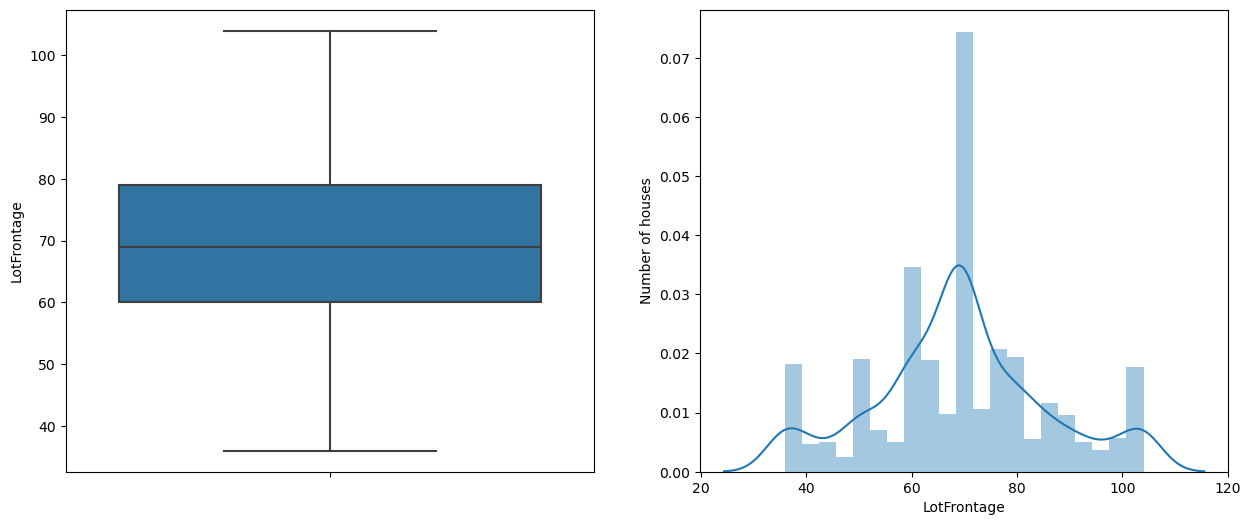

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=data_train["LotFrontage"])
fig.set_title('')
fig.set_ylabel("LotFrontage")

plt.subplot(1, 2, 2)
fig = sns.distplot(data_train["LotFrontage"].dropna())
fig.set_ylabel('Number of houses')
fig.set_xlabel("LotFrontage")

plt.show()

In [29]:
#Outlies in discrete variables
for var in discrete:
    print(data_train[var].value_counts() / np.float(len(data_train)))
    print()

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

5    0.562329
6    0.172603
7    0.140411
8    0.049315
4    0.039041
3    0.017123
9    0.015068
2    0.003425
1    0.000685
Name: OverallCond, dtype: float64

0    0.586301
1    0.402740
2    0.010274
3    0.000685
Name: BsmtFullBath, dtype: float64

0    0.943836
1    0.054795
2    0.001370
Name: BsmtHalfBath, dtype: float64

2    0.526027
1    0.445205
3    0.022603
0    0.006164
Name: FullBath, dtype: float64

0    0.625342
1    0.366438
2    0.008219
Name: HalfBath, dtype: float64

3    0.550685
2    0.245205
4    0.145890
1    0

In [30]:
#Binning
#OverallQual
bins = [0, 5, 7, 10]
pd.cut(data_train['OverallQual'], bins).value_counts()

(5, 7]     693
(0, 5]     538
(7, 10]    229
Name: OverallQual, dtype: int64

In [31]:
data_train['OverallQual_binned'] = pd.cut(data_train['OverallQual'], bins)

In [32]:
#Reducing cardinality
#Number of labels: cardinality
for var in categorical:
    print(var, 'contains', len(data_train[var].unique()), 'labels')

MSZoning contains 5 labels
Street contains 2 labels
LotShape contains 4 labels
LandContour contains 4 labels
Utilities contains 2 labels
LotConfig contains 5 labels
LandSlope contains 3 labels
Neighborhood contains 25 labels
Condition1 contains 9 labels
Condition2 contains 8 labels
BldgType contains 5 labels
HouseStyle contains 8 labels
RoofStyle contains 6 labels
RoofMatl contains 8 labels
Exterior1st contains 15 labels
Exterior2nd contains 16 labels
MasVnrType contains 5 labels
MasVnrArea contains 5 labels
ExterQual contains 4 labels
ExterCond contains 5 labels
Foundation contains 6 labels
BsmtQual contains 5 labels
BsmtCond contains 5 labels
BsmtExposure contains 5 labels
BsmtFinType1 contains 7 labels
BsmtFinType2 contains 7 labels
Heating contains 6 labels
HeatingQC contains 5 labels
CentralAir contains 2 labels
Electrical contains 5 labels
KitchenQual contains 4 labels
Functional contains 7 labels
FireplaceQu contains 6 labels
GarageType contains 7 labels
GarageFinish contains 4 

In [35]:
#Total Floor Area
data_train['TotalFlrSF'] = data_train['1stFlrSF'] + data_train['2ndFlrSF']
#Total Bathroom Area
data_train['TotalBath'] = data_train.FullBath + data_train.BsmtFullBath + 0.5 * (data_train.BsmtHalfBath + data_train.HalfBath)
#Total Basement Area
data_train['TotalSF'] = data_train.TotalBsmtSF + data_train.GrLivArea

In [36]:
#INDICATOR VARIABLES
data_train['haspool']=data_train['PoolArea'].apply(lambda x: 1 if x>0 else 0 )
data_train['has2ndfloor']=data_train['has2ndfloor'].apply(lambda x: 1 if x>0 else 0 )
data_train['hasgarden']=data_train['hasgarden'].apply(lambda x: 1 if x>0 else 0 )
data_train['hasbsmt']=data_train['hasbsmt'].apply(lambda x: 1 if x>0 else 0 )
data_train['hasfireplace']=data_train['hasfireplace'].apply(lambda x: 1 if x>0 else 0 )


KeyError: 'has2ndfloor'